In [1]:
!pip install fastai

     |████████████████████████████████| 3.5MB 7.6MB/s eta 0:00:01
     |████████████████████████████████| 92kB 37.9MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 39.3MB/s ta 0:00:01
     |████████████████████████████████| 163kB 61.3MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 45.9MB/s eta 0:00:01
     |████████████████████████████████| 122kB 49.9MB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 60.4MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 39.2MB/s eta 0:00:01
     |████████████████████████████████| 194kB 47.7MB/s eta 0:00:01


     |████████████████████████████████| 40kB 28.5MB/s eta 0:00:01
  Stored in directory: /home/praveenbenedict/.cache/pip/wheels/31/36/8f/1ed7e6f1b3295499c8bbab934262f2494d0f6aebe0c5860754
Successfully built bottleneck
  Stored in directory: /home/praveenbenedict/.cache/pip/wheels/45/3e/33/2286dfb90e4d3e197356552c0743678bb158d47f6e05540029
  Stored in directory: /home/praveenbenedict/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built fastai nvidia-ml-py3


In [1]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


In [2]:
import pandas as pd
import pickle
import numpy as np
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
import matplotlib.pyplot as plt
# from lshash import *
from PIL import Image
from tqdm import tqdm_notebook
pd.set_option('display.max_columns', 500)

In [3]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


In [4]:
path_new_data=Path('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos')

In [5]:
path_new_data

PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos')

In [6]:
!pip install facenet-pytorch

In [8]:
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/00/b6/9cfa56b4081ad13874b0c6f96af8ce16cfbc1cb06bedf8e9164ce5551ec1/pip-19.3.1-py2.py3-none-any.whl
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


In [7]:
fnames = get_image_files(path_new_data)

In [8]:
fnames
#this is a list object inga...ok

[PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0690.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0846.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0742.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0608.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_1116.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0416.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0976.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0532.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0898.JPG'),
 PosixPath('/data/home/praveenbenedict/phosphe

In [9]:
tfms = get_transforms(
    do_flip=True, 
    flip_vert=True, 
    max_rotate=1, 
    max_lighting=2, 
    max_zoom=4, 
    max_warp=0
)

In [9]:
fnames[0:5]

[PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0690.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0846.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0742.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_0608.JPG'),
 PosixPath('/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos/IMG_1116.JPG')]

In [10]:
my_pattern=r'/([^/]+)+.JPG$'

In [11]:
data = ImageDataBunch.from_name_re(path_new_data, fnames, my_pattern,valid_pct=0.0, ds_tfms=get_transforms(), size=224,bs=16).normalize(imagenet_stats)

In [12]:
#issue is labels problem....valid dosen't represent labels from training set

In [13]:
data

ImageDataBunch;

Train: LabelList (949 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
IMG_0690,IMG_0846,IMG_0742,IMG_0608,IMG_1116
Path: /data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos;

Test: None

In [14]:
data.classes

['IMG_0266',
 'IMG_0267',
 'IMG_0268',
 'IMG_0269',
 'IMG_0270',
 'IMG_0271',
 'IMG_0272',
 'IMG_0273',
 'IMG_0274',
 'IMG_0275',
 'IMG_0276',
 'IMG_0277',
 'IMG_0278',
 'IMG_0279',
 'IMG_0280',
 'IMG_0281',
 'IMG_0282',
 'IMG_0283',
 'IMG_0284',
 'IMG_0285',
 'IMG_0286',
 'IMG_0287',
 'IMG_0288',
 'IMG_0289',
 'IMG_0290',
 'IMG_0291',
 'IMG_0292',
 'IMG_0293',
 'IMG_0294',
 'IMG_0295',
 'IMG_0296',
 'IMG_0297',
 'IMG_0298',
 'IMG_0299',
 'IMG_0300',
 'IMG_0301',
 'IMG_0302',
 'IMG_0303',
 'IMG_0304',
 'IMG_0305',
 'IMG_0306',
 'IMG_0307',
 'IMG_0308',
 'IMG_0309',
 'IMG_0310',
 'IMG_0311',
 'IMG_0312',
 'IMG_0313',
 'IMG_0314',
 'IMG_0315',
 'IMG_0316',
 'IMG_0317',
 'IMG_0318',
 'IMG_0319',
 'IMG_0320',
 'IMG_0321',
 'IMG_0322',
 'IMG_0323',
 'IMG_0324',
 'IMG_0325',
 'IMG_0326',
 'IMG_0327',
 'IMG_0328',
 'IMG_0329',
 'IMG_0330',
 'IMG_0331',
 'IMG_0332',
 'IMG_0333',
 'IMG_0334',
 'IMG_0335',
 'IMG_0336',
 'IMG_0337',
 'IMG_0338',
 'IMG_0339',
 'IMG_0340',
 'IMG_0341',
 'IMG_0342',

In [15]:
len(data.classes)

949

In [16]:
print('Train dataset size: {0}'.format(len(data.train_ds.x)))
print('Test dataset size: {0}'.format(len(data.valid_ds.x)))

Train dataset size: 949
Test dataset size: 1


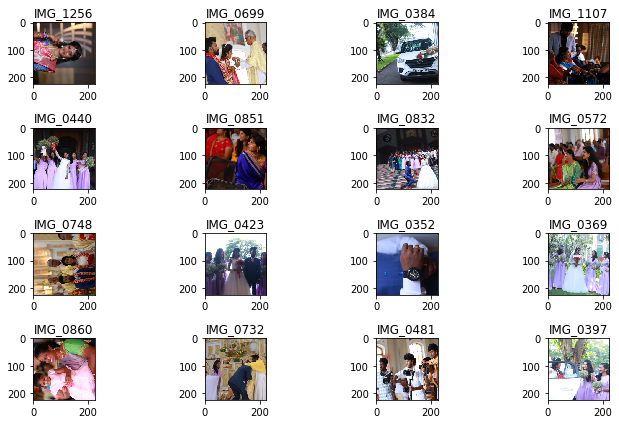

In [17]:
data.show_batch(rows=4, figsize=(10,6), hide_axis=False)

In [18]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


In [19]:
!pip install pretrainedmodels

In [20]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import pretrainedmodels
# from facenet_pytorch import InceptionResnetV1

In [21]:
import pretrainedmodels

def get_fastai_model(pretrained=True, **kwargs ): 
    return InceptionResnetV1(pretrained='casia-webface')

In [22]:
learn = create_cnn(data,get_fastai_model,metrics=accuracy)

/anaconda/envs/py36/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


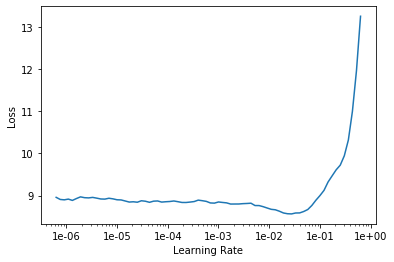

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(10,1e-2)

In [25]:
## Saving stage 1
learn.save('stage-1-incept')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


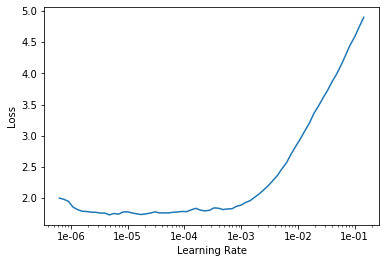

In [26]:
## Unfreeing layer and finding ideal learning rate
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [28]:
#fitting 10 epochs
learn.fit_one_cycle(10, slice(1e-5, 1e-2/5)) 

In [29]:
## Saving model weights1
learn.save('stage-2-incept')

In [32]:
#now wanna export my model
#NOTE:learn.save() and learn.load() is for the current session alone
learn.export(file = Path("/data/home/praveenbenedict/phospheneai/Image DeDuplication/data/export.pkl"))#this doesn't work in another notebook,wanna check this.

In [33]:

class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()
        
sf = SaveFeatures(learn.model[1][5]) ## Output before the last FC layer

In [35]:

## By running this feature vectors would be saved in sf variable initated above
_= learn.get_preds(data.train_ds)
_= learn.get_preds(DatasetType.Valid)

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/anaconda/envs/py36/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/anaconda/envs/py36/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/anaconda/envs/py36/lib/python3.6/site-packages/fastai/data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/anaconda/envs/py36/lib/python3.6/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/fastai/vision/data.py", line 270, in get
    fn = super().get(i)
  File "/anaconda/envs/py36/lib/python3.6/site-packages/fastai/data_block.py", line 75, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0


In [36]:
data.train_ds

LabelList (949 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
IMG_0690,IMG_0846,IMG_0742,IMG_0608,IMG_1116
Path: /data/home/praveenbenedict/phospheneai/Image DeDuplication/data/candid_photos

In [37]:
img_path = [str(x) for x in (list(data.train_ds.items)+list(data.valid_ds.items))]
feature_dict = dict(zip(img_path,sf.features))

In [38]:
sf.features[0]

array([10.696199,  0.      ,  0.      ,  0.      , ...,  0.      ,  2.020282, 10.587475,  0.      ], dtype=float32)

In [39]:
## Exporting as pickle
pickle.dump(feature_dict, open(path_new_data/"feature_dict.p", "wb"))

In [40]:
## Loading Feature dictionary
feature_dict = pickle.load(open(path_new_data/'feature_dict.p','rb'))

In [44]:
!pip install lshash3

In [51]:
from lshash import lshash 
## Locality Sensitive Hashing
# params
k = 10 # hash size
L = 5  # number of tables
d = 512 # Dimension of Feature vector
lsh = lshash.LSHash(hash_size=k, input_dim=d, num_hashtables=L)

# LSH on all the images
for img_path, vec in tqdm_notebook(feature_dict.items()):
    # HashTable.generate_hash(vec,img_path)
    lsh.index(vec.flatten(), extra_data=img_path)

In [52]:
## Exporting as pickle
pickle.dump(lsh, open(path_new_data/'lsh.p', "wb"))

In [53]:
feature_dict = pickle.load(open(path_new_data/'feature_dict.p','rb'))
lsh = pickle.load(open(path_new_data/'lsh.p','rb'))

def get_similar_item(idx, feature_dict, lsh_variable, n_items):
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                     num_results=n_items+1, distance_func='hamming')
    
    columns = 3
    rows = int(np.ceil(n_items+1/columns))
    fig=plt.figure(figsize=(2*rows, 3*rows))
    for i in range(1, columns*rows +1):
        if i<n_items+2:
            img = Image.open(response[i-1][0][1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
    return plt.show()

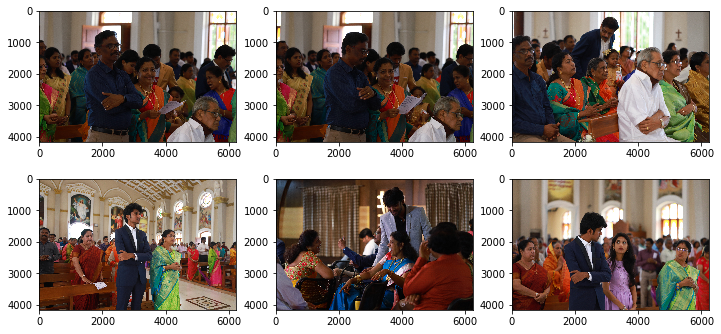

In [54]:
get_similar_item(0, feature_dict, lsh,5)

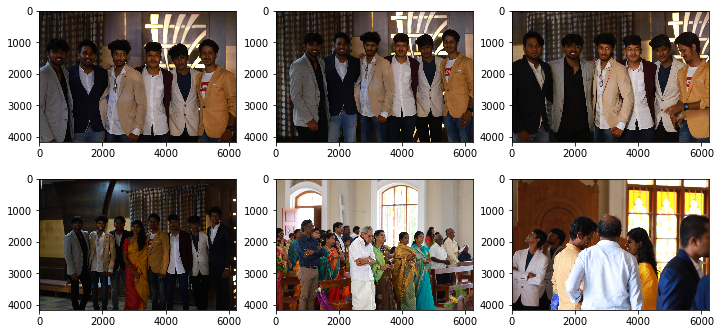

In [61]:
get_similar_item(110, feature_dict, lsh,5)

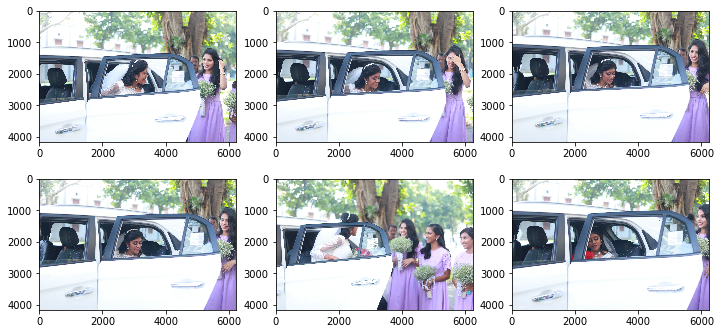

In [59]:
get_similar_item(150, feature_dict, lsh,5)

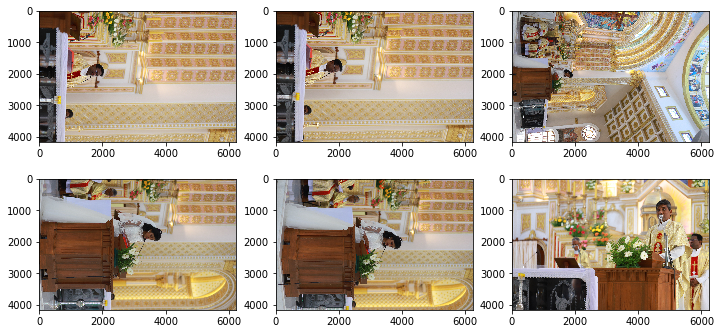

In [57]:
get_similar_item(60, feature_dict, lsh,5)

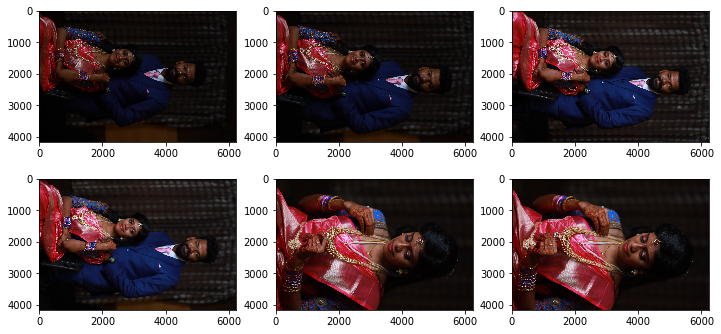

In [62]:
get_similar_item(250, feature_dict, lsh,5)

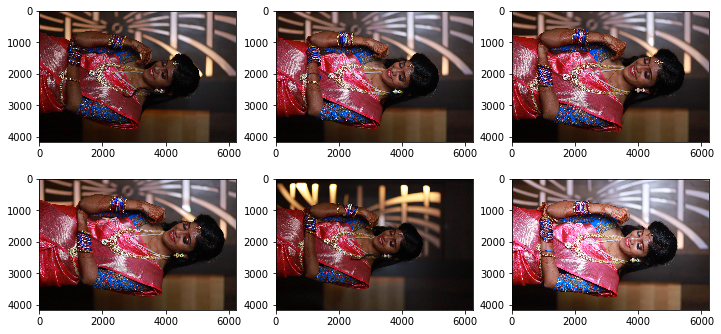

In [65]:
get_similar_item(350, feature_dict, lsh,5)

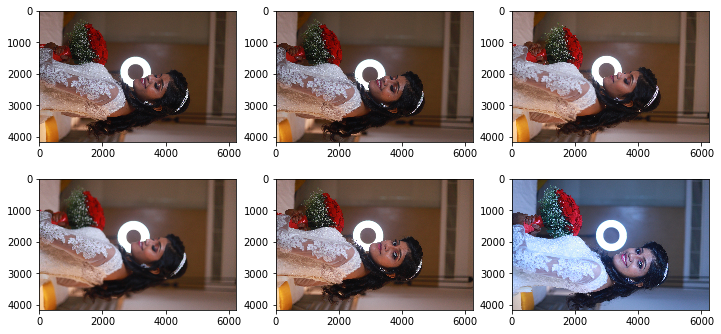

In [64]:
get_similar_item(684, feature_dict, lsh,5)

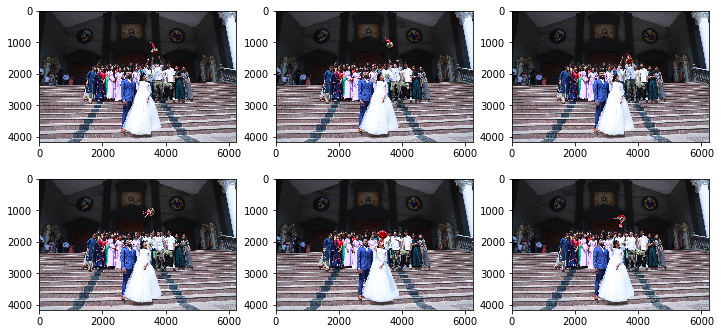

In [66]:
get_similar_item(700, feature_dict, lsh,5)